# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
pip install palmerpenguins

In [4]:
# Code Here
# Code Here
from palmerpenguins import load_penguins
import pandas as pd
penguins = load_penguins()
penguins.head()




,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
penguins = penguins.dropna()

X = penguins.drop(columns = ['species'])
y = penguins['species']

X = pd.get_dummies(X, drop_first = False, dtype = int)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [6]:
# Code Here
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict


# first make pipelines
knn1 = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3)
)

knn2 = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=12)
)

tree1 = make_pipeline(
    DecisionTreeClassifier(max_depth=2, random_state=321)
)

tree2 = make_pipeline(
    DecisionTreeClassifier(max_depth=5, random_state=321)
)

# cross validation predictions (test predictions)
knn1_cv = cross_val_predict(knn1, X, y, cv=5)
knn2_cv = cross_val_predict(knn2, X, y, cv=5)

tree1_cv = cross_val_predict(tree1, X, y, cv=5)
tree2_cv = cross_val_predict(tree2, X, y, cv=5)

# fit the models to the whole dataset for training predictions
knn1.fit(X, y)
knn2.fit(X, y)
tree1.fit(X, y)
tree2.fit(X, y)

knn1_train = knn1.predict(X)
knn2_train = knn2.predict(X)
tree1_train = tree1.predict(X)
tree2_train = tree2.predict(X)


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

print("=== KNN (k=3) ===")
print("Confusion Matrix (TEST):")
print(confusion_matrix(y, knn1_cv))

print("\nAccuracy (TEST):", accuracy_score(y, knn1_cv))

print("\nPrecision/Recall/F1 (TEST):")
print(classification_report(y, knn1_cv))


=== KNN (k=3) ===
Confusion Matrix (TEST via CV):
[[144   2   0]
 [  3  65   0]
 [  0   0 119]]

Accuracy (TEST): 0.984984984984985

Precision/Recall/F1 (TEST):
              precision    recall  f1-score   support

      Adelie       0.98      0.99      0.98       146
   Chinstrap       0.97      0.96      0.96        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.98      0.98      0.98       333



In [8]:
print("=== KNN (k=12) ===")
print("Confusion Matrix (TEST):")
print(confusion_matrix(y, knn2_cv))

print("\nAccuracy (TEST):", accuracy_score(y, knn2_cv))

print("\nPrecision/Recall/F1 (TEST):")
print(classification_report(y, knn2_cv))


=== KNN (k=12) ===
Confusion Matrix (TEST via CV):
[[145   1   0]
 [  2  66   0]
 [  0   0 119]]

Accuracy (TEST): 0.990990990990991

Precision/Recall/F1 (TEST):
              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



In [9]:
print("=== Decision Tree (depth=2) ===")
print("Confusion Matrix (TEST):")
print(confusion_matrix(y, tree1_cv))

print("\nAccuracy (TEST):", accuracy_score(y, tree1_cv))

print("\nPrecision/Recall/F1 (TEST):")
print(classification_report(y, tree1_cv))


=== Decision Tree (depth=2) ===
Confusion Matrix (TEST via CV):
[[138   7   1]
 [  6  62   0]
 [  0   2 117]]

Accuracy (TEST): 0.9519519519519519

Precision/Recall/F1 (TEST):
              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       146
   Chinstrap       0.87      0.91      0.89        68
      Gentoo       0.99      0.98      0.99       119

    accuracy                           0.95       333
   macro avg       0.94      0.95      0.94       333
weighted avg       0.95      0.95      0.95       333



In [10]:
print("=== Decision Tree (depth=5) ===")
print("Confusion Matrix (TEST):")
print(confusion_matrix(y, tree2_cv))

print("\nAccuracy (TEST):", accuracy_score(y, tree2_cv))

print("\nPrecision/Recall/F1 (TEST):")
print(classification_report(y, tree2_cv))


=== Decision Tree (depth=5) ===
Confusion Matrix (TEST via CV):
[[140   3   3]
 [  3  65   0]
 [  1   0 118]]

Accuracy (TEST): 0.96996996996997

Precision/Recall/F1 (TEST):
              precision    recall  f1-score   support

      Adelie       0.97      0.96      0.97       146
   Chinstrap       0.96      0.96      0.96        68
      Gentoo       0.98      0.99      0.98       119

    accuracy                           0.97       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333



In [12]:
# finding AUC scores of each model

knn1_proba = cross_val_predict(knn1, X, y, cv=5, method="predict_proba")
knn2_proba = cross_val_predict(knn2, X, y, cv=5, method="predict_proba")
tree1_proba = cross_val_predict(tree1, X, y, cv=5, method="predict_proba")
tree2_proba = cross_val_predict(tree2, X, y, cv=5, method="predict_proba")


knn1_auc = roc_auc_score(y, knn1_proba, multi_class="ovr")
print("KNN k=3 AUC:", knn1_auc)
knn2_auc = roc_auc_score(y, knn2_proba, multi_class="ovr")
print("KNN k=12 AUC:", knn2_auc)
tree1_auc = roc_auc_score(y, tree1_proba, multi_class="ovr")
print("Tree depth=2 AUC:", tree1_auc)
tree2_auc = roc_auc_score(y, tree2_proba, multi_class="ovr")
print("Tree depth=5 AUC:", tree2_auc)


KNN k=3 AUC: 0.99746183959615
KNN k=12 AUC: 0.9993029860737735
Tree depth=2 AUC: 0.9698756984236171
Tree depth=5 AUC: 0.9766088800913938


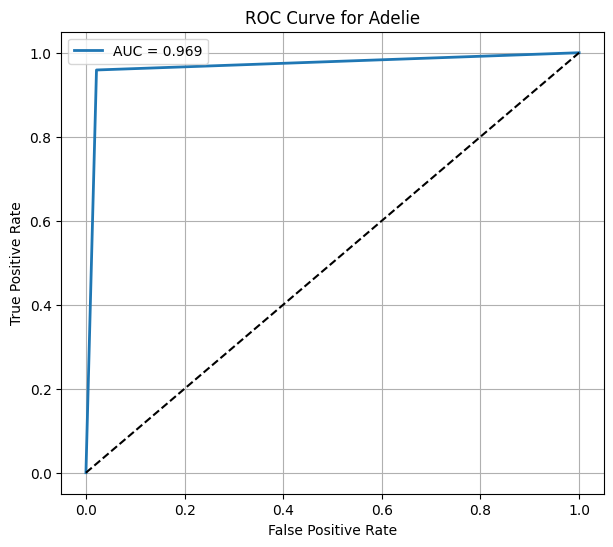

In [21]:
from sklearn.preprocessing import label_binarize

classes = y.unique()
y_bin = label_binarize(y, classes=classes)   # convert to binary matrix

proba = tree2_proba
species_idx = 0

fpr, tpr, _ = roc_curve(y_bin[:, species_idx], proba[:, species_idx])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], 'k--')

plt.title(f"ROC Curve for {classes[species_idx]}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

